In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("max_row", None) # 행 수 제한 해제
pd.set_option("max_column", None) # 열 수 제한 해제
%matplotlib inline

# 0. 데이터 불러오기

In [19]:
data = pd.read_csv('data/asos_253_20120603_20220602.csv')

In [20]:
data.tail(3)

,Unnamed: 0,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
3649,3649,253,김해시,2022-05-31,22.6,18.2,603,29.1,1303,NaN,NaN,NaN,NaN,NaN,NaN,10.9,160,1637,6.9,160,1636,2.4,2046,320.0,8.8,18,1309,44.4,11.6,1001.6,1010.5,2335.0,1003.0,30.0,1007.8,14.4,12.9,1100.0,3.48,29.06,NaN,NaN,NaN,NaN,NaN,1.8,0.0,28.5,13.8,25.6,25.3,24.7,24.0,NaN,NaN,NaN,NaN,NaN,6.5,9.3,NaN,NaN,NaN
3650,3650,253,김해시,2022-06-01,22.2,17.5,512,29.5,1145,NaN,NaN,NaN,NaN,NaN,NaN,8.1,180,1342,4.8,160,1607,1.8,1542,160.0,11.1,21,1335,52.5,13.5,1000.9,1010.2,1.0,1004.7,1712.0,1007.1,14.4,11.2,1300.0,3.49,26.86,NaN,NaN,NaN,NaN,NaN,5.6,0.4,28.9,14.1,26.1,25.7,24.9,24.2,NaN,NaN,NaN,NaN,NaN,5.9,8.4,NaN,NaN,NaN
3651,3651,253,김해시,2022-06-02,21.8,16.6,544,27.7,1328,NaN,NaN,NaN,NaN,NaN,NaN,8.2,160,1454,5.4,160,1452,1.5,1327,110.0,14.9,47,1615,66.1,17.0,1001.0,1008.4,805.0,1005.7,1622.0,1007.2,14.4,13.0,1200.0,3.61,29.41,NaN,NaN,NaN,NaN,NaN,0.0,0.0,29.1,12.8,26.2,25.9,25.1,24.4,NaN,NaN,NaN,NaN,NaN,5.4,7.8,NaN,NaN,NaN


In [21]:
data.shape

(3652, 63)

10년 치의 기록에 해당하는 3652개의 데이터가 있으며, 63개의 속성을 가지는 것으로 확인되었다.

즉, 이 데이터의 차원 수는 현재 63차원이다.

# 1. 전처리

## 1.1. 라벨 수치화
 우리의 목표는 주어진 기상 데이터에 대해 그 기상 현상이 일어난 연중 날짜를 추측하는 것이다.
 
 시간은 연속적인 개념이므로, 우선 라벨로 사용할 `tm` 컬럼을 수치화해야 한다.
 
 1년 중 몇 번째 날인지로 쉽게 나타낼 수 있다.

In [22]:
import datetime

def convertTm(x):
    return int(datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%j'))

data['dayOfYear'] = data['tm'].apply(convertTm)

data.drop('tm', axis=1, inplace=True)

data.head(3)

,Unnamed: 0,stnId,stnNm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,dayOfYear
0,0,253,김해시,21.8,16.7,550,27.9,1243,NaN,NaN,NaN,NaN,NaN,NaN,7.7,140,1321,4.6,160,1330,2.0,1765,200.0,12.0,37,1017,55.4,14.1,1006.5,1015.0,758.0,1011.4,1529.0,1013.3,14.4,12.8,1200.0,3.38,27.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.6,8.7,21.0,19.9,19.3,18.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155
1,1,253,김해시,22.1,16.7,449,27.8,1325,NaN,NaN,NaN,NaN,NaN,NaN,7.6,160,1502,5.0,160,1454,1.9,1612,160.0,14.6,47,900,63.6,16.9,1005.5,1014.3,843.0,1010.4,1739.0,1012.3,14.4,4.7,1300.0,2.66,18.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.1,8.7,20.6,19.6,19.4,18.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156
2,2,253,김해시,23.9,20.5,431,30.3,1226,NaN,NaN,NaN,NaN,NaN,NaN,8.3,160,1259,6.5,160,1305,2.1,1855,160.0,15.5,36,1228,61.5,17.7,1001.0,1011.3,11.0,1005.4,2358.0,1007.8,14.4,10.8,1100.0,3.26,24.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.2,13.3,21.9,20.8,20.1,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157


## 1.2. 결측치 보정, 불완전 속성 제거

 우선 정제해야 할 데이터의 결측치 수를 확인하자.

In [23]:
data.isna().sum()

Unnamed: 0           0
stnId                0
stnNm                0
avgTa                7
minTa                0
minTaHrmt            0
maxTa                0
maxTaHrmt            0
mi10MaxRn         2886
mi10MaxRnHrmt     3059
hr1MaxRn          2884
hr1MaxRnHrmt      3036
sumRnDur          3650
sumRn             2551
maxInsWs             0
maxInsWsWd           0
maxInsWsHrmt         0
maxWs                0
maxWsWd              0
maxWsHrmt            0
avgWs                0
hr24SumRws           0
maxWd               12
avgTd                8
minRhm               0
minRhmHrmt           0
avgRhm               7
avgPv                8
avgPa               11
maxPs                4
maxPsHrmt            4
minPs                5
minPsHrmt            4
avgPs               12
ssDur                0
sumSsHr             17
hr1MaxIcsrHrmt       2
hr1MaxIcsr           2
sumGsr               5
ddMefs            3651
ddMefsHrmt        3651
ddMes             3650
ddMesHrmt         3650
sumDpthFhsc

결측치가 있는 컬럼은 결측치의 수가 100개 이하로 적은 컬럼과, 1000개 이상으로 많은 컬럼으로 뚜렷하게 구분된다.

전처리를 진행하자.

### 1.2.1. 식별자 컬럼 제거

 우선, 데이터를 구분하기 위한 식별자(identifier)로 사용되는 컬럼이 있다. 그러나 학습에는 사용하지 않을 것이므로 제거한다.

In [24]:
dummyCols = ['Unnamed: 0', 'stnId', 'stnNm']
data.drop(dummyCols, axis=1, inplace=True)

### 1.2.2. '평균' 컬럼의 결측치

 어떤 값의 최솟값과 최댓값을 나타내는 컬럼이 있을 때, 그 값의 평균값은 최솟값과 최댓값의 평균과 비슷할 것이다. 그러므로 최솟값과 최댓값을 가지는 컬럼 중 평균값이 결측된 컬럼에 대해,
 
 $$ avg = \frac{min + max}{2} $$
 
로 추측하여 결측치를 메우자.

In [25]:
data['avgTa'].fillna(((data['minTa'] + data['maxTa']) / 2), inplace=True)
data['avgPs'].fillna(((data['minPs'] + data['maxPs']) / 2), inplace=True)

### 1.2.3. 강수량과 적설량의 결측치

강수량과 적설량에서 결측치가 있는 데이터는 해당 날짜에 비나 눈이 내리지 않았음을 뜻한다. 그러므로 이와 관련된 컬럼을 모두 0으로 보정한다.

In [26]:
rainSnowCols = [
    'mi10MaxRn', 'mi10MaxRnHrmt', 'hr1MaxRn', 'hr1MaxRnHrmt', 'sumRnDur', 'sumRn',
    'ddMefs', 'ddMefsHrmt', 'ddMes', 'ddMesHrmt', 'sumDpthFhsc'
]
for col in rainSnowCols:
    data[col].fillna(0, inplace=True)

### 1.2.4. 나머지 결측치

결측치가 많은 나머지 컬럼은 다른 컬럼으로 보정할 수 없으므로, 해당 컬럼을 학습에서 제외한다.

In [27]:
for col in data.columns:
    if data[col].isna().sum() > 100:
        data.drop(col, axis=1, inplace=True)

결측치가 적은 컬럼의 경우에는 해당 결측치가 나타난 데이터를 학습에서 제외한다.

In [28]:
data.dropna(inplace=True)

이후 결측치를 확인해보면,

In [29]:
data.isna().sum().sum()

0

위와 같이 결측치가 모두 제거된 것을 확인할 수 있다.

In [30]:
data.shape

(3562, 48)

결측치 처리가 끝난 후 위와 같이 90개의 데이터와 15개의 컬럼이 제외되었음을 확인할 수 있다. 총 데이터 수를 고려하면 손실이 매우 적다고 할 수 있다.

## 1.2.4. Reindexing

데이터를 제거하였으므로 index를 재설정한다.

In [31]:
data.index = pd.RangeIndex(data.shape[0])

data.index

RangeIndex(start=0, stop=3562, step=1)

## 1.3. 스케일링(scaling)

### 1.3.1. Hrmt(hhmi) 표기법
 이 데이터에서 컬럼명이 "Hrmt"로 끝나는 컬럼은 '시간-분' 순서로 표시된 일중 시각을 나타낸다. 예를 들면 다음과 같다.
 * 630: 06시 30분 (오전 6시 30분)
 * 1920: 19시 20분 (오후 7시 20분)
 
이는 인간이 읽기에는 편하지만 정시로 넘어갈 때마다 40만큼 도약이 생긴다. 이는 해당 컬럼의 학습에 부정적인 영향을 끼친다.

그러므로, 도약을 없앤 표기, 즉, '당일 자정으로부터 지난 분 단위 시간'으로 교정한다.

In [32]:
# 교정 전
data[['minTaHrmt']].head(3)

,minTaHrmt
0,550
1,449
2,431


In [33]:
for col in data.columns:
    if col.endswith('Hrmt'):
        hours = data[col] // 100
        minutes = data[col] % 100
        
        data[col] = hours * 60 + minutes
        
data.columns = data.columns.str.replace('Hrmt', 'Mnt') # 컬럼 이름 변경

In [34]:
# 교정 후
data[['minTaMnt']].head(3)

,minTaMnt
0,350
1,289
2,271


### 1.3.2. 정규화(Normalization)

학습의 정확도를 높이기 위해 정규화를 진행한다.

In [35]:
data.columns

Index(['avgTa', 'minTa', 'minTaMnt', 'maxTa', 'maxTaMnt', 'mi10MaxRn',
       'mi10MaxRnMnt', 'hr1MaxRn', 'hr1MaxRnMnt', 'sumRnDur', 'sumRn',
       'maxInsWs', 'maxInsWsWd', 'maxInsWsMnt', 'maxWs', 'maxWsWd', 'maxWsMnt',
       'avgWs', 'hr24SumRws', 'maxWd', 'avgTd', 'minRhm', 'minRhmMnt',
       'avgRhm', 'avgPv', 'avgPa', 'maxPs', 'maxPsMnt', 'minPs', 'minPsMnt',
       'avgPs', 'ssDur', 'sumSsHr', 'hr1MaxIcsrMnt', 'hr1MaxIcsr', 'sumGsr',
       'ddMefs', 'ddMefsMnt', 'ddMes', 'ddMesMnt', 'sumDpthFhsc', 'avgTs',
       'minTg', 'avgCm5Te', 'avgCm10Te', 'avgCm20Te', 'avgCm30Te',
       'dayOfYear'],
      dtype='object')

 컬럼 중 범주형(categorical) 데이터와 수치형(numerical) 데이터를 분리해 수치형 데이터만 정규화하고, 다시 합친다.

In [36]:
from sklearn.preprocessing import StandardScaler
# categorical columns
catColNames = [
    'minTaMnt',
    'maxTaMnt',
    'mi10MaxRnMnt',
    'hr1MaxRnMnt',
    'maxInsWsWd',
    'maxInsWsMnt',
    'maxWsWd',
    'maxWsMnt',
    'maxWd',
    'minRhmMnt',
    'maxPsMnt',
    'minPsMnt',
    'hr1MaxIcsrMnt',
    'ddMefsMnt',
    'ddMesMnt',
    'dayOfYear'
]

numData = data.drop(catColNames, axis=1)
catData = data[catColNames]

scaler = StandardScaler()
scaler.fit(numData)

numDataScaled = pd.DataFrame(data=scaler.transform(numData), columns=numData.columns)

dataScaled = pd.concat([numDataScaled, catData], axis=1)
dataScaled = dataScaled[data.columns.tolist()] # 컬럼 순서 정렬

dataScaled.tail(3)

,avgTa,minTa,minTaMnt,maxTa,maxTaMnt,mi10MaxRn,mi10MaxRnMnt,hr1MaxRn,hr1MaxRnMnt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsMnt,maxWs,maxWsWd,maxWsMnt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmMnt,avgRhm,avgPv,avgPa,maxPs,maxPsMnt,minPs,minPsMnt,avgPs,ssDur,sumSsHr,hr1MaxIcsrMnt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsMnt,ddMes,ddMesMnt,sumDpthFhsc,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,dayOfYear
3559,0.843873,0.786012,363,0.965597,783,-0.263973,0.0,-0.247265,0.0,-0.016758,-0.27588,1.029441,160,997,1.157704,160,996,0.440237,0.039976,320.0,0.129208,-1.232779,789,-1.056975,-0.176392,-1.095385,-1.161005,1415.0,-1.422371,30.0,-1.166589,1.343063,1.520792,660.0,1.609019,2.291354,-0.016758,0.0,-0.022122,0.0,-0.016758,1.212002,0.560956,1.062071,1.080783,0.993306,0.933243,151
3560,0.798546,0.710647,312,1.010774,705,-0.263973,0.0,-0.247265,0.0,-0.016758,-0.27588,-0.020722,180,822,-0.132617,160,967,-0.295799,-0.081307,160.0,0.325691,-1.071268,815,-0.595973,0.043159,-1.190858,-1.200704,1.0,-1.202639,1032.0,-1.259400,1.343063,1.095444,780.0,1.620402,1.975391,-0.016758,0.0,-0.022122,0.0,-0.016758,1.251977,0.589244,1.119090,1.126595,1.016873,0.957976,152
3561,0.753219,0.613750,344,0.807478,808,-0.263973,0.0,-0.247265,0.0,-0.016758,-0.27588,0.016784,160,894,0.236046,160,892,-0.663816,-0.133045,110.0,0.650314,0.328493,975,0.178055,0.447595,-1.177219,-1.438895,485.0,-1.073385,982.0,-1.246141,1.343063,1.545813,720.0,1.757004,2.341621,-0.016758,0.0,-0.022122,0.0,-0.016758,1.271965,0.466662,1.130494,1.149501,1.040440,0.982709,153


# 2. 학습

## 2.1. 훈련 데이터-시험 데이터 분리

In [37]:
from sklearn.model_selection import train_test_split

X = dataScaled.drop('dayOfYear', axis=1)
y = dataScaled['dayOfYear']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=59)

 정제된 데이터셋의 컬럼 중 레이블(label)는 `dayOfYear` 컬럼이고, feature는 나머지 모든 컬럼이다. 데이터셋의 70%를 훈련 데이터로, 30%를 검증(verification) 데이터로 사용한다.

## 2.2. 모델

 데이터가 작아 학습에 많은 시간이 걸리지 않으므로, 본 프로젝트에서는 회귀 분석에 사용되는 다음의 모델 3개를 모두 사용해본 후, 예측 결과가 가장 잘 나온 한 종류를 뽑아 실제 데이터와 함께 학습시키고자 한다.
 * RandomForestRegressor (RFR)
 * DecisionTreeRegressor (DTR)
 * LinearRegression (LR)

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

models = []

models.append(('RFR', RandomForestRegressor(random_state=59)))
models.append(('DTR', DecisionTreeRegressor(random_state=59)))
models.append(('LR', LinearRegression()))

for _, model in models:
    model.fit(X_train, y_train)

## 3. 예측

RFR - RMSE: 34.7 / R2*100: 89.24


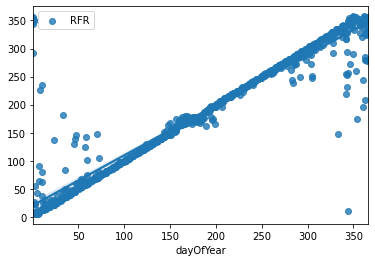

DTR - RMSE: 45.01 / R2*100: 81.89


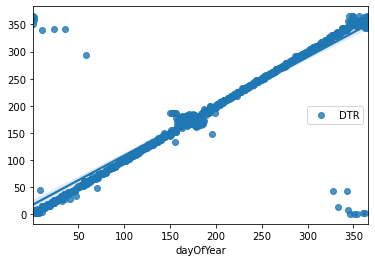

LR - RMSE: 65.42 / R2*100: 61.75


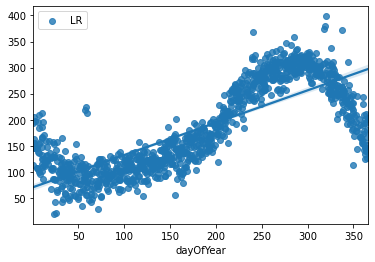

In [41]:
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

for name, model in models:
    pred = model.predict(X_test)
    print('{} - RMSE: {} / R2*100: {}'.format(
        name,
        np.round(np.sqrt(metrics.mean_squared_error(y_test, pred)), 2),
        np.round(metrics.r2_score(y_test, pred) * 100, 2)
    ))
    
    ax = sns.regplot(y_test, pred, data=dataScaled, label=name)
    ax.legend(loc="best")
    plt.show()
    
    res = pd.DataFrame()
    res['Y_Test'] = y_test
    res['PRED'] = pred
    res.head()

 3개 중 2개의 모델은 직선에 지나치게 가깝게 밀집해있고, 나머지 1개는 오차에 대해 과적합 된 것을 볼 수 있다. 그러나 `dayOfYear`가 1에 가깝거나 365에 가까울 때 직관에서 크게 벗어난 예측값이 생겼다.

 예측값이 직선과 크게 일치하는 원인은 검증 데이터가 전체 데이터 중에서 무작위로 추출되었기 때문이라고 생각한다. 기상은 단시간에 크게 바뀌지 않는데, 이러한 특성 때문에 특정한 기상 데이터는 시간적으로 인접한 주변 데이터들로부터 추측되기 쉽기 때문이라고 생각한다. 따라서 이 현상을 과적합(overfit)으로 판단하기에는 근거가 부족하다. 과적합 여부를 정확히 판단하기 위해서는 검증 데이터의 범위에서 벗어난 새로운 데이터를 시험(test)해야 할 것이다. 

 한편, 예측값의 오차는 레이블의 데이터가 가지는 주기성을 이해하지 못했기 때문이다. 즉, `dayOfYear`가 365에 가까울 때(연말)과 1에 가까울 때(연초)의 기상은 대체적으로 비슷할테지만, 수치상으로는 연속되지 않아 직선에서 벗어난 예측값이 생긴다.